In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
# 2. Asset Classes

# 2.5. Real Estate

# U.S. Real Estate Investment Trust

# Data Query and Range Delimiting
reitquery = web.DataReader('IYR', 'yahoo', '2006-04-01', '2016-05-01')
creit = reitquery['Close']
mreitall = creit.asfreq('M', method='pad')
mreitall = pd.DataFrame(mreitall)
mreitall.columns = ['mreit']


In [3]:
# Monthly and Annual Returns Calculation
mreitall.loc[:, 'mreitret'] = mreitall.loc[:, 'mreit'] / mreitall.loc[:, 'mreit'].shift(1) - 1
mreitall.loc[:, 'areitret'] = mreitall.loc[:, 'mreit'] / mreitall.loc[:, 'mreit'].shift(12) - 1


In [4]:
# Cumulative Monthly Returns Calculation
mreitall.loc[:, 'mreitcum'] = np.cumprod(mreitall.loc[:, 'mreitret'] + 1) - 1


In [5]:
# Annualized Monthly Returns Calculation
mreitall.loc[:, 'mreitcuma'] = np.cumprod(mreitall.loc[:, 'mreitret'] + 1) ** (12 / len(mreitall)) - 1


In [6]:
# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 3, 31)
mreitreta = mreitall.at[lastdate, 'mreitcuma']


In [7]:
# Annualized Monthly Standard Deviation Calculation
mreitstdeva = np.std(mreitall.loc[:, 'mreitret']) * np.sqrt(12)


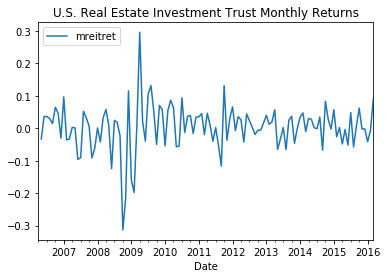

In [8]:
# 2.5. Real Estate Charts and Tables

# Monthly Returns Chart
mreitall.plot(y=['mreitret'])
plt.title('U.S. Real Estate Investment Trust Monthly Returns')
plt.legend(loc='upper left')
plt.show()


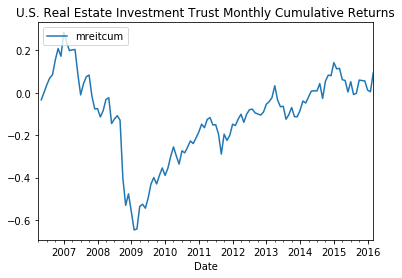

In [9]:
# Cumulative Monthly Returns Chart
mreitall.plot(y=['mreitcum'])
plt.title('U.S. Real Estate Investment Trust Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [10]:
# Annualized Monthly Return and Standard Deviation Table
reitdata = [{'0': '', '1': 'mreitret'},
        {'0': 'Annualized Return', '1': mreitreta},
        {'0': 'Annualized Standard Deviation', '1': mreitstdeva}]
reittable = pd.DataFrame(reitdata)
print("")
print(reittable)
print("")



                               0           1
0                                   mreitret
1              Annualized Return  0.00912388
2  Annualized Standard Deviation     0.24419

